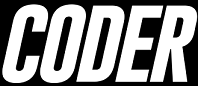

# Regex basico

In [ ]:
import re

In [ ]:
texto = "Hola mundo, esto es una prueba con .123"
palabras = re.findall(r"\w+", texto)
print(palabras)

['Hola', 'mundo', 'esto', 'es', 'una', 'prueba', 'con', '123']


In [ ]:
texto = "Hay 3 gatos, 2 perros y 1 loro."
numeros = re.findall(r"\d+", texto)
print(numeros)

['3', '2', '1']


In [ ]:
texto = "Teléfono: +1 (234) 567-890!"
solo_numeros = re.sub(r"[^0-9]+", "", texto)
print(solo_numeros)

1234567890


In [ ]:
correo = "ejemplo@dominio.com"
es_valido = re.match(r"^\w+@\w+\.\w+$", correo)
print(es_valido)

<re.Match object; span=(0, 19), match='ejemplo@dominio.com'>


\b: Representa un límite de palabra. Un límite de palabra es una posición entre un carácter de palabra (como una letra, un número o un guion bajo) y un carácter que no es de palabra (como un espacio, un signo de puntuación o el inicio/final de una cadena). Este asegura que la coincidencia ocurra al inicio o al final de una palabra.

m: Especifica que la palabra debe comenzar con la letra "m".

\w: Coincide con cualquier carácter de palabra, que incluye letras (mayúsculas y minúsculas), dígitos y el guion bajo (_).

*: Significa "cero o más repeticiones" del patrón anterior, que en este caso es \w. Esto permite que coincida con cualquier palabra que comience con "m" y que contenga cero o más caracteres de palabra después.

In [ ]:
texto = "en la mañana es mi mejor momento para ejercitar."
palabras_con_m = re.findall(r"\bm\w*", texto)
print(palabras_con_m)

['mañana', 'mi', 'mejor', 'momento']


\d: Representa un dígito (cualquier número del 0 al 9).

{2}: Indica que debe haber exactamente dos dígitos consecutivos.

/: Es el carácter literal de la barra diagonal. Debe aparecer exactamente en la posición indicada.

\d{4}: Representa cuatro dígitos consecutivos.

In [ ]:
texto = "La reunión fue el 20/20/2023 y la próxima será el 05/10/2023."
fechas = re.findall(r"\d{2}/\d{2}/\d{4}", texto)
print(fechas)

['20/20/2023', '05/10/2023']


In [ ]:
texto = "mañana es mi mejor momento para meditar."
palabras_con_m = re.findall(r"\bm\w*", texto)
print(palabras_con_m)

['mañana', 'mi', 'mejor', 'momento', 'meditar']


In [ ]:
texto = "Esto    tiene    espacios    extra."
texto_sin_espacios_extra = re.sub(r"\s+", " ", texto)
print(texto_sin_espacios_extra)


Esto tiene espacios extra.


In [ ]:
codigo_postal = "1234556"
es_codigo_postal = bool(re.match(r"^\d{5}$", codigo_postal))
print(es_codigo_postal)

False


In [ ]:
texto = "Esta es la primera oración. Aquí empieza la segunda. Esta es la tercera."
oraciones = re.split(r"\.\s*", texto)
print(oraciones)

['Esta es la primera oración', 'Aquí empieza la segunda', 'Esta es la tercera', '']


In [ ]:
texto = "Llama al (123) 456-7890 o al (957) 654-3210."
telefonos = re.findall(r"\(\d{3}\) \d{3}-\d{4}", texto)
print(telefonos)

['(123) 456-7890', '(957) 654-3210']


# Carga de datos
Utilizamos un conjunto de datos de alrededor de 37000 reseñas de videos de Amazon Instant Video y 1700000 reseñas de películas y programas de televisión, todas obtenidas del sitio web: http://jmcauley.ucsd.edu/data/amazon/. Tenga en cuenta que hay conjuntos de datos mucho más grandes disponibles en el mismo sitio. Podemos esperar resultados mejores y más consistentes en conjuntos de datos más grandes (como reseñas de libros). Tenga en cuenta que estos conjuntos de datos están comprimidos (gzip) y están en formato JSON, cada línea representa una revisión y cada línea es su propio objeto JSON.

Comenzamos cargando el conjunto de datos a continuación:

In [ ]:
%%time
import gzip
import json
import string

import nltk # imports the natural language toolkit
import pandas as pd
import plotly
import os
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


CPU times: user 2.54 s, sys: 402 ms, total: 2.95 s
Wall time: 5.77 s


True

In [ ]:
#review amazon
!gdown --id 1w0YmkALN8bXpYoJs0UBVuS2yS9RIHAhH

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Failed to retrieve file url:

	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses.
	Check FAQ in https://github.com/wkentaro/gdown?tab=readme-ov-file#faq.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1w0YmkALN8bXpYoJs0UBVuS2yS9RIHAhH

but Gdown can't. Please check connections and permissions.


In [ ]:
#movies and tv
#!gdown --id url
# o
!wget https://mcauleylab.ucsd.edu/public_datasets/data/amazon_2023/raw/review_categories/Movies_and_TV.jsonl.gz

--2025-02-18 21:59:24--  https://mcauleylab.ucsd.edu/public_datasets/data/amazon_2023/raw/review_categories/Movies_and_TV.jsonl.gz
Resolving mcauleylab.ucsd.edu (mcauleylab.ucsd.edu)... 169.228.63.88
Connecting to mcauleylab.ucsd.edu (mcauleylab.ucsd.edu)|169.228.63.88|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2396672075 (2.2G) [application/x-gzip]
Saving to: ‘Movies_and_TV.jsonl.gz’

Movies_and_TV.jsonl 100%[===================>]   2.23G  39.2MB/s    in 54s     

2025-02-18 22:00:19 (42.2 MB/s) - ‘Movies_and_TV.jsonl.gz’ saved [2396672075/2396672075]



In [ ]:
os.getcwd()
instant_video = pd.read_json("reviews_Amazon_Instant_Video_5.json.gz", lines=True, compression='gzip')

FileNotFoundError: File reviews_Amazon_Instant_Video_5.json.gz does not exist

In [ ]:
type(instant_video)
instant_video.head()

**Problema de negocio**. Su tarea principal es explorar los datos proporcionados y utilizar los resultados de su investigación para diseñar funciones relevantes que podrían facilitar el análisis posterior y la creación de modelos.

In [ ]:
%%time
# https://amazon-reviews-2023.github.io/
# podemos decirle a pandas que nuestro archivo esta en formato gzip y realizara el proceso de descompresion
# para esto usamos el atributo `lines=True` para indicar que cada linea en el archivo tiene su propio JSON object
#instant_video = pd.read_json("reviews_Amazon_Instant_Video_5.json.gz", lines=True, compression='gzip')
# ----------
# El archivo Películas y TV es muy grande. Si tienes problemas para cargarlo, puedes cargar solo los primeros
# 100,000 reseñas usando 'chunksize' (elimine el comentario de la línea con 'chunksize' y comente la línea
# después de lo que carga el archivo completo en `movies_tv`). Todo el análisis puede ser
# hecho de la misma manera utilizando solo el subconjunto de revisiones, pero algunos de los resultados pueden ser diferentes de los ejemplos.
# ----------
movies_tv = next(pd.read_json("/content/Movies_and_TV.jsonl.gz", lines=True, compression='gzip', chunksize=100000))
#movies_tv = pd.read_json("reviews_Movies_and_TV_5.json.gz", lines=True, compression='gzip')
movies_tv.head()

Miremos algunos de los atributos

* **reviewerID:** A unique ID to identify the author of the review.
* **asin:** The ["Amazon Standard Identification Number"](https://www.amazon.com/gp/seller/asin-upc-isbn-info.html) which provides more information about the exact product and version.
* **reviewerName:** The username chosen by the reviewer.
* **helpful:** A record of how many users indicated that the review was helpful/not helpful.
* **reviewText:** The full text of the review.
* **overall:** The overall rating (1-5) left by the reviewer.
* **summary:** A short version of the review, used as the title.
* **unixReviewTime:** The date that the review was created, in [Unix Epoch](https://en.wikipedia.org/wiki/Unix_time) format.
* **reviewTime:** A human readable date giving the day, month, and year.

In [ ]:
print(len(instant_video))
print(instant_video.head(5))

In [ ]:
print(len(movies_tv))
print(movies_tv.head(5))

Notamos que `movies_tv` es extremadamente larga con casi 2 millones de reseñas, y varias columnas parecen poco interesantes o difíciles de trabajar (por ejemplo, `reviewerID`, `asin`, `reviewername`, `reviewtime`). Dejamos caer alguna información para hacer que algunos de nuestros análisis posteriores sean más eficientes. También agregamos una columna de fecha y hora con objetos de fecha y hora de Python para resumir más fácilmente los datos:

Comenzamos cargando el conjunto de datos a continuación:

In [ ]:
%%time
instant_video['datetime'] = pd.to_datetime(instant_video['reviewTime'], format="%m %d, %Y")

In [ ]:
movies_tv['datetime'] = pd.to_datetime(movies_tv['timestamp'], format="%m %d, %Y")


In [ ]:
instant_video = instant_video.drop(columns = ['reviewerID', 'asin', 'reviewerName', 'reviewTime'])


In [ ]:
movies_tv = movies_tv.drop(columns = ['user_id', 'asin', 'timestamp'])

movies_tv.head(5)

NameError: name 'movies_tv' is not defined

In [ ]:
movies_tv.datetime.value_counts().head(20)

NameError: name 'movies_tv' is not defined

<Axes: >

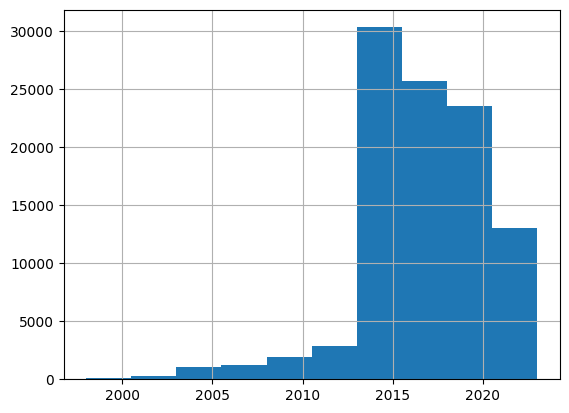

In [ ]:
movies_tv.datetime.dt.year.hist()

# Histogramas de conteos

array([[<Axes: title={'center': 'rating'}>,
        <Axes: title={'center': 'helpful_vote'}>],
       [<Axes: title={'center': 'datetime'}>, <Axes: >]], dtype=object)

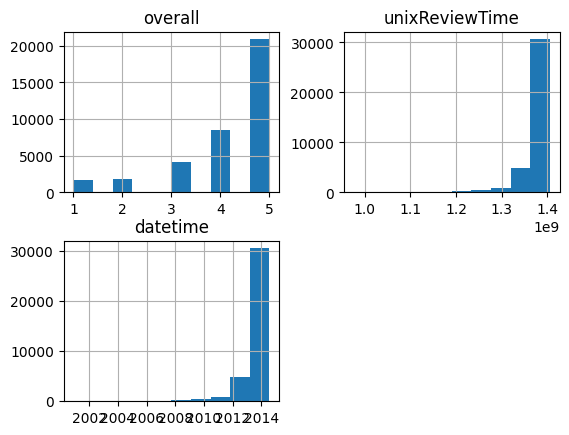

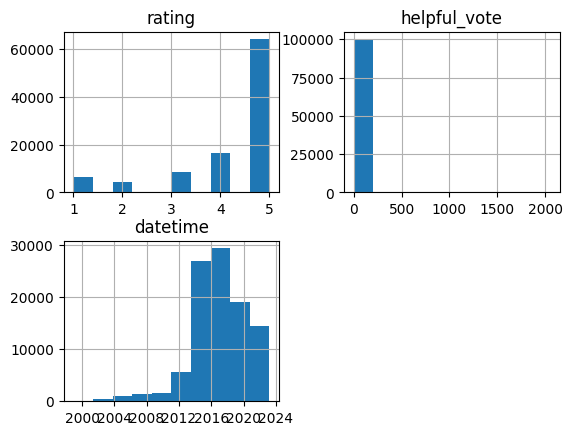

In [ ]:
instant_video.hist()
movies_tv.hist()

Notamos eso:

1. La mayoría de las reseñas son buenas; de hecho, ¡más de la mitad son perfectas (5/5 estrellas) en ambos conjuntos de datos!
2. Casi todas las revisiones de videos instantáneos son extremadamente recientes. Será muy difícil detectar tendencias sin corregir esto. Las reseñas de TV Movie están sustancialmente más dispersas (aunque también incluyen un pico reciente).

In [ ]:
instant_video['year'] = instant_video.datetime.dt.year
instant_video.groupby(['year']).agg({'overall': 'mean', 'year': 'count'})

,overall,year
year,,
2000,5.000000,1
2004,4.000000,1
2006,4.937500,16
2007,4.245763,118
2008,4.298701,231
2009,4.251381,362
2010,4.093085,376
2011,4.012414,725
2012,4.111845,2727


In [ ]:
movies_tv['year'] = movies_tv.datetime.dt.year
movies_tv.groupby(['year']).agg({'rating': 'mean', 'year': 'count'})

,rating,year
year,,
1998,5.000000,3
1999,4.200000,15
2000,4.439394,66
2001,4.430556,144
2002,4.364706,170
2003,4.285024,207
2004,4.223443,273
2005,4.107861,547
2006,4.137324,568


# Promedio de ratings en el tiempo

In [ ]:
result = instant_video.groupby(instant_video.datetime.dt.year).agg({'overall': 'mean', 'overall': 'count'})
result

,overall
datetime,
2000,1
2004,1
2006,16
2007,118
2008,231
2009,362
2010,376
2011,725
2012,2727


<Axes: xlabel='datetime'>

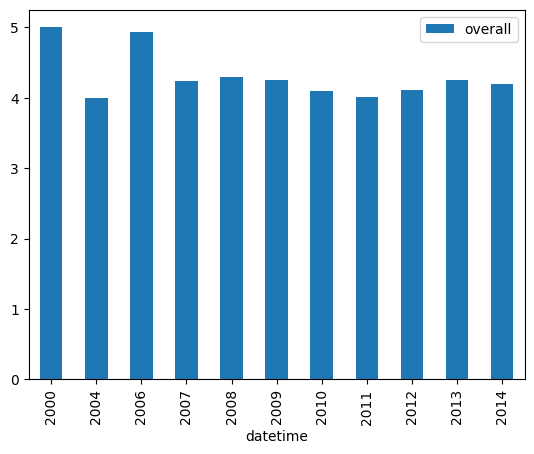

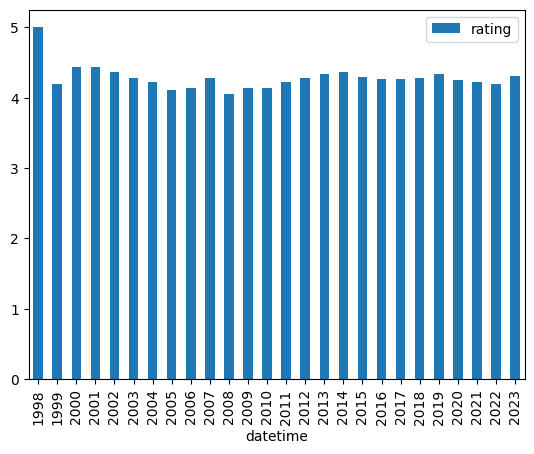

In [ ]:
instant_video.groupby(instant_video.datetime.dt.year)['overall'].mean().to_frame().plot(kind="bar")
movies_tv.groupby(movies_tv.datetime.dt.year)['rating'].mean().to_frame().plot(kind="bar")

Notamos eso:

1. No hay tendencias notables de cambio de calificaciones con el tiempo.

2. Hay algunos años atípicos con calificaciones más altas, pero estos son años en los que la cantidad de revisiones es muy pequeña, lo que hace que el promedio sea menos confiable.

# Promedios longitudes de revisiones por año

<Axes: xlabel='datetime'>

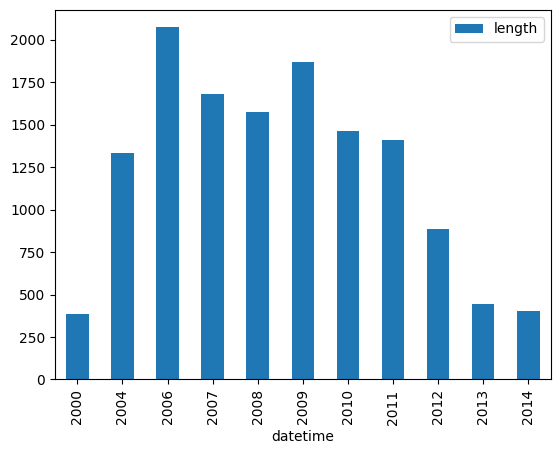

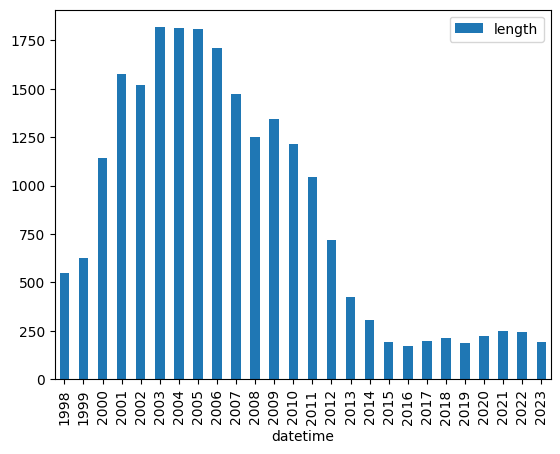

In [ ]:
instant_video['length'] = instant_video['reviewText'].apply(len)
instant_video.groupby(instant_video.datetime.dt.year)['length'].mean().to_frame().plot(kind="bar")

movies_tv['length'] = movies_tv['text'].apply(len)
movies_tv.groupby(movies_tv.datetime.dt.year)['length'].mean().to_frame().plot(kind="bar")

Observamos una aparente tendencia al alza en la duración de las reseñas durante la década de 1990 y principios de la de 2000, seguida de una tendencia a la baja. Debido a que ambos conjuntos de datos tienen revisiones más recientes, la tendencia a la baja en la duración de la revisión es más confiable.

# Encontrar palabras mas frecuentes

Encontremos las diez palabras sin stopwrods que aparecen con mayor frecuencia en: (i) todas las reseñas, (ii) reseñas positivas, (iii) reseñas negativas. ¿Te sorprenden los resultados? ¿Por qué o por qué no?

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime

short_movies_tv = movies_tv.head(100000)

def get_top_n_words(corpus, n=1, k=1):
    t1 = datetime.now()
    vec = CountVectorizer(ngram_range=(k, k), stop_words="english")
    bag_of_words = vec.fit_transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

In [ ]:
vec = CountVectorizer(ngram_range=(1, 1), stop_words="english")
bag_of_words = vec.fit_transform(short_movies_tv["text"])

In [ ]:
bag_of_words.sum(axis=0)

matrix([[151, 254,   1, ...,   1,   1,   1]])

br 87205
movie 48680
great 24517
good 23130
like 19714
love 18629
just 16462
story 14574
watch 14065
film 13982
series 13820
time 13234
really 12385
34 12308
dvd 9699
season 9121
movies 9104
watching 7937
don 7843
did 6870
CPU times: user 7.17 s, sys: 79.1 ms, total: 7.25 s
Wall time: 8.05 s


<Axes: title={'center': 'Top 20 words from all reviews'}, xlabel='words'>

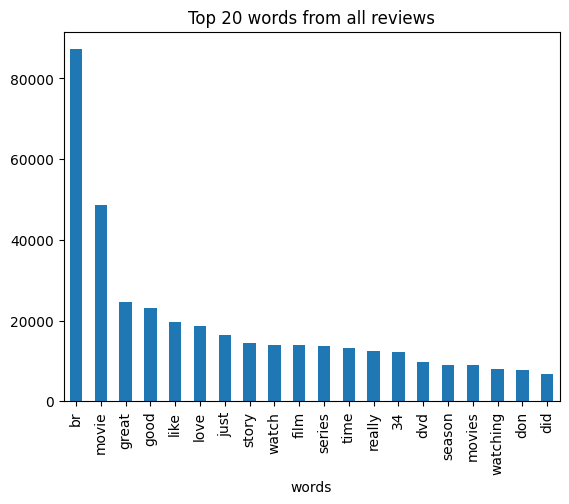

In [ ]:
%%time
# Todos los reviews
common_words = get_top_n_words(short_movies_tv["text"], 20, 1)
for word, freq in common_words:
    print(word, freq)

df = pd.DataFrame(common_words, columns=["words", "count"])
df.groupby("words").sum()["count"].sort_values(ascending=False).plot(
    kind="bar", title="Top 20 words from all reviews"
)

br 67530
movie 37543
great 22403
good 18455
love 17051
like 14195
series 12202
story 11364
watch 11185
just 10936
film 10200
time 10199
really 9329
34 8771
dvd 7780
season 7714
movies 7335
watching 6150
loved 6021
best 5602
CPU times: user 4.06 s, sys: 27.7 ms, total: 4.09 s
Wall time: 4.47 s


<Axes: title={'center': 'Top 20 words from good reviews'}, xlabel='words'>

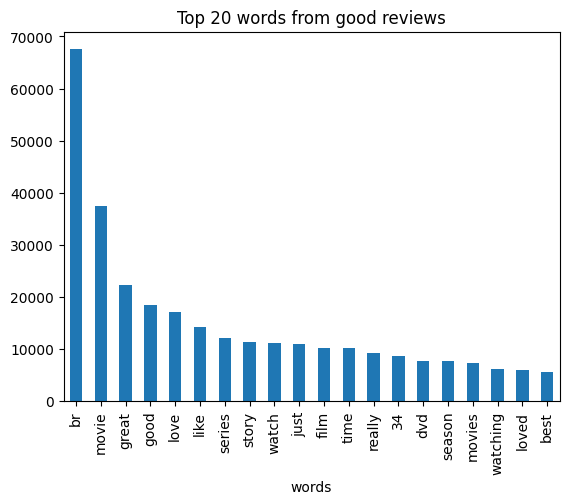

In [ ]:
%%time
# reviews Positivos
good_indices = short_movies_tv["rating"] > 3.1
good_reviews = short_movies_tv[good_indices]
bad_indices = short_movies_tv["rating"] < 2.1
bad_reviews = short_movies_tv[bad_indices]

common_words = get_top_n_words(good_reviews["text"], 20)
for word, freq in common_words:
    print(word, freq)

df = pd.DataFrame(common_words, columns=["words", 'count'])
df.groupby('words').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 words from good reviews'
)

br 8554
movie 6240
just 3108
like 2792
good 1947
film 1907
34 1732
time 1719
story 1601
bad 1592
watch 1589
really 1531
don 1454
did 1234
didn 1164
acting 1093
watching 1050
better 1015
movies 964
people 964
CPU times: user 1.18 s, sys: 30.7 ms, total: 1.21 s
Wall time: 1.65 s


<Axes: title={'center': 'Top 20 words from bad reviews'}, xlabel='words'>

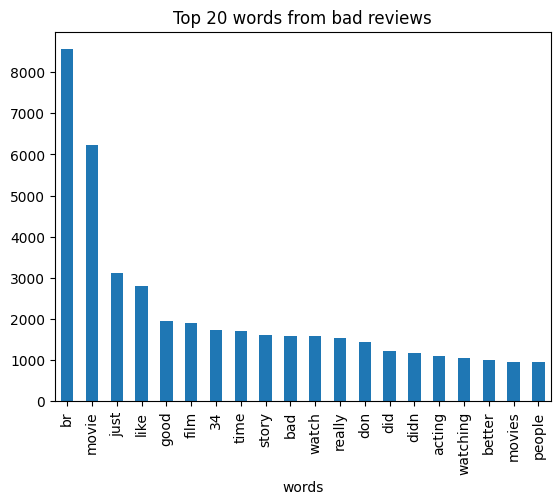

In [ ]:
%%time
# reviews Negativos
common_words = get_top_n_words(bad_reviews['text'], 20)
for word, freq in common_words:
    print(word, freq)
df = pd.DataFrame(common_words, columns=['words', 'count'])
df.groupby('words').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 words from bad reviews'
)

Tengan en cuenta que los resultados son casi idénticos en los tres grupos de reseñas: casi todas las palabras más importantes son palabras genéricas muy comunes sobre películas (es decir, "película" en sí). Como vimos en el caso anterior, esto no es tan sorprendente, dado que estamos tratando con datos en un contexto específico de una película, y las palabras vacías solo tendrán en cuenta las palabras genéricas que aparecen en muchos contextos en inglés, las stopwords más comunes serán el vocabulario básico relacionado con las películas, no necesariamente palabras más precisas que den más color a las reseñas en sí.

Encuentremos las palabras que sean indicativas de malas críticas. Es decir, palabras que aparecen a menudo en malas críticas y no en buenas críticas. ¿Qué son estas palabras y son sorprendentes?

CPU times: user 1.93 s, sys: 702 ms, total: 2.63 s
Wall time: 2.52 s


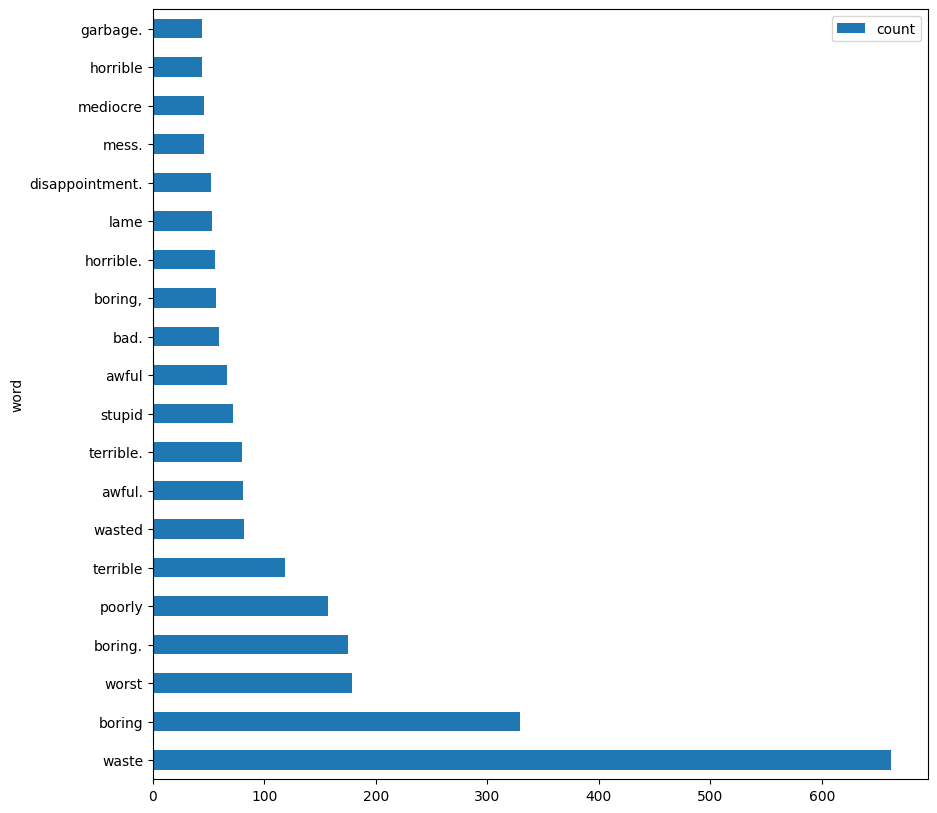

In [ ]:
%%time
from collections import Counter

def get_indicative_words(text1, text2, n=20):
    c1 = Counter(text1.lower().split(" "))
    c2 = Counter(text2.lower().split(" "))
    ind_words_1 = (c1 - c2).most_common(n)
    ind_words_2 = (c2 - c1).most_common(n)
    x, y = zip(*ind_words_2)

    df = pd.DataFrame({'word': x, 'count': y})
    df.plot.barh(
        x='word', y='count', figsize=(10,10)
    )

get_indicative_words(' '.join(good_reviews['text']), ' '.join(bad_reviews['text']))

In [ ]:
text1 = ' '.join(good_reviews['text'])
text2 = ' '.join(bad_reviews['text'])


In [ ]:
c1 = Counter(text1.lower().split(" "))
c2 = Counter(text2.lower().split(" "))
ind_words_1 = (c1 - c2).most_common(20)
ind_words_2 = (c2 - c1).most_common(20)

In [ ]:
c1 - c2

Counter({'amazon,': 79,
         'please': 374,
         'buy': 1204,
         'the': 174132,
         'show!': 722,
         "i'm": 3024,
         'hooked!': 66,
         'my': 16769,
         'kiddos': 21,
         'love': 14914,
         'this': 54242,
         'show!!': 79,
         '...there': 1,
         'should': 1640,
         'be': 12323,
         'more': 9529,
         'of': 74566,
         'a': 94446,
         'range': 190,
         'characters': 2969,
         'with': 29093,
         'high-functioning': 1,
         'autism,': 7,
         'too.': 820,
         'jack': 391,
         'is': 60676,
         'closest': 43,
         'representation': 36,
         'but': 20496,
         'also': 5041,
         'falls': 207,
         'on': 22213,
         'severe': 37,
         'scale,': 6,
         'socially.': 1,
         'i': 62067,
         'that': 28116,
         'storyline': 467,
         'some': 8654,
         'episodes': 1553,
         'tie': 59,
         'in': 46013,
       

In [ ]:
ind_words_1

[('the', 174132),
 ('and', 111266),
 ('a', 94446),
 ('to', 78215),
 ('of', 74566),
 ('', 66156),
 ('i', 62067),
 ('is', 60676),
 ('this', 54242),
 ('in', 46013),
 ('it', 42327),
 ('for', 32334),
 ('with', 29093),
 ('that', 28116),
 ('you', 25741),
 ('was', 24686),
 ('as', 24502),
 ('/><br', 23097),
 ('on', 22213),
 ('but', 20496)]

Notamos que muchas de las palabras son obviamente indicativas de una mala película, como "horrible", "decepción", "horrible". "Canjeable" es una palabra interesante que no tiene una asociación negativa obvia, pero probablemente indica que incluso en las críticas negativas, los revisores tienden a hablar de "una característica de redimir algo" (o afirman que la película). También hay algo de ruido en los datos, como es normal en los datos de texto. "g" y "shao" no parecen palabras significativas.

Inspeccionemos manualmente las primeras 10 reseñas negativas que contengan la palabra "buena". ¿Que notaste? ¿Cómo sugiere esto que debemos proceder a continuación?

Una posible solución se da a continuación. Tenga en cuenta que el uso de códigos de escape Ansi para colorear es un "buen extra" y no se espera necesariamente de las soluciones de los estudiantes:

In [ ]:
v_bad_indices = movies_tv['rating'] < 1.1
v_bad_reviews = movies_tv[v_bad_indices]
"""colores comunes
Red = '\033[91m'
Green = '\033[92m'
Blue = '\033[94m'
Cyan = '\033[96m'
White = '\033[97m'
Yellow = '\033[93m'
Magenta = '\033[95m'
Grey = '\033[90m'
Black = '\033[90m'
Default = '\033[99m'
"""
RED_START = "\033[91m"
END = "\033[0m"

good_word_bad_review = [rev for rev in v_bad_reviews['text'] if 'good' in rev.lower()]

print(len(good_word_bad_review))
for rev in good_word_bad_review[:1000]:
    good_i = rev.lower().index("good")

    # adicionamos los codigos Ansi para hacer un highlight a los matches
    print(rev[good_i-50: good_i] + RED_START + rev[good_i:good_i+4] + END + rev[good_i+4:good_i +50])

773
 this movie. Let me start by saying that I love a good mystery and that I usually enjoy these kind o
n't use the name of another movie that earned its good reputation. I'm comparing it to the original 
en terrible this season! This is no longer a feel good show that most of us go to Hallmark for. They
 This wasn't funny, it was romantic and it wasn't good!
not need to be so raunchy. A show can actually be good without using all the crude language and get 
e most annoying person on this show. She is not a good actress and she comes across as an annoying l
his movie for anything due to it. The plot was no good either, just about a disfunctional family and
Not a very good movie
 cuss/swear words, and they were all thrown out.  Good story lines, but not anything we would watch 
Good action film but not realistic.  I expected be
roken up their relationship.  Not even soap opera good.
ieve that some people actually thought this was a good movie.  It could have been much better with s
 A 

Vemos que "bueno" se usa de diferentes maneras en las críticas negativas. Por ejemplo:

1. A veces, el revisor señala algo que es realmente bueno, antes de decir que esto no compensa problemas más importantes.
2. A veces, el crítico dice que algo bueno no está presente, ya que "casi todo lo que he visto hasta ahora no se parece al buen cine de ninguna manera".
3. De vez en cuando, la palabra "bueno" se refiere a la moralidad.

Revise la lista de malas críticas que contienen la palabra "buena" que encontramos en la última pregunta. Para cada revisión, extraiga lo siguiente:

1. La primera palabra después de "good"
2. La primera palabra después de "good" que es un sustantivo o cardinal
3. La última palabra antes de "good" que es un sustantivo o cardinal

In [ ]:
# Parte i
import re

post_good = []
for sentence in good_word_bad_review:

    # extraer la palabra seguida de good. Hacemos un strip de caracteres
    post = re.search("good.?\W*(\w+).*\s?", sentence, re.IGNORECASE)

    # si good es la ultima palabra en el review no habra palabra
    # despues de ella
    if post:
        post_good.append(post.groups()[0])

post_good = [i for i in post_good if i]
print(post_good[0:10])

['mystery', 'reputation', 'show', 'without', 'actress', 'either', 'movie', 'story', 'action', 'movie']


In [ ]:
# Parte ii
nltk.download('averaged_perceptron_tagger')
good_pos = ['CD', 'FW', 'NN', 'NNS', 'NNP', 'NNPS']

def extract_interesting(sentence, good):
    words = nltk.word_tokenize(sentence)
    interesting = [k for k, v in nltk.pos_tag(words) if v in good]
    return(interesting)

# Usamos esto para definir una nueva funcion para la proxima palabra interesante
def next_word2(sentence):
    post = re.findall(r'good.*', sentence)
    if len(post) > 0:
        interesting = extract_interesting(post[0], good_pos)
        if (len(interesting) > 0):
            return(interesting[0])
        else:
            return('')
    else:
        return('')

# Finalmente, buscamos en nuestra lista
post_good2 = []

for sentence in good_word_bad_review[:1000]:
    temp = next_word2(sentence)
    post_good2.append(temp)

post_good2 = [i for i in post_good2 if i]
print(post_good2[0:10])


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


['mystery', 'reputation', 'show', 'language', 'actress', 'family', 'movie', 'movie', 'Blair', '1/2']


In [ ]:
# parte III
# funcion para extraer palabras antes  de que parezca la palabra "good"

def prev_word(sentence):
    post = re.findall(r'.*?good', sentence)
    if (len(post) > 0):
        temp = extract_interesting(post[0],good_pos)
        if (len(temp) > 0):
            return(temp[len(temp)-1])
        else:
            return('')
    else:
        return('')

# Encontramos nuestra lista
pre_good = []
for sentence in good_word_bad_review[:1000]:
    temp = prev_word(sentence)
    pre_good.append(temp)

pre_good = [i for i in pre_good if i]
print(pre_good[0:10])

['movie', 'movie', 'feel', 'Nothing', 'show', 'show', 'plot', 'good', 'people', 'time']


# n-grams

Hemos visto que las palabras individuales no siempre son muy informativas. Busque los bigramas y trigramas más informativos, tanto en reseñas positivas como negativas. Muestre los bigramas y trigramas más informativos y haga un breve análisis de los n-gramas que identificó.

In [ ]:
def get_top_n_words(corpus, n=1, k=1):
    vec = CountVectorizer(ngram_range=(k,k),stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

br br 26601
great movie 3412
good movie 2583
love movie 1688
highly recommend 1352
blu ray 1126
ve seen 1113
story line 1076
year old 1066
really enjoyed 1002
worth watching 863
loved movie 863
minutes br 820
movie great 776
enjoyed movie 733
really good 724
great story 716
br movie 711
br rebecca 703
rebecca review 699


<Axes: title={'center': 'Top 20 bigrams from good reviews'}, xlabel='words'>

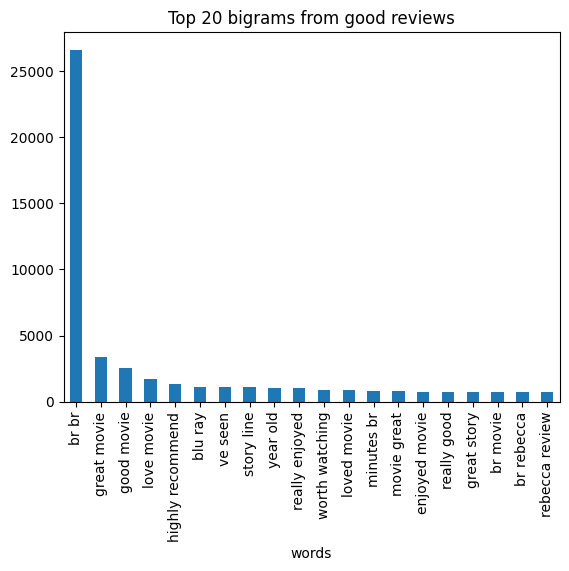

In [ ]:
# Bigramas con buenas revisiones
common_words = get_top_n_words(good_reviews['text'], 20, 2)
for word, freq in common_words:
    print(word, freq)

df = pd.DataFrame(common_words, columns=['words', 'count'])
df.groupby('words').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 bigrams from good reviews'
)

br br rebecca 701
br rebecca review 699
br br movie 570
movie br br 368
br br overall 307
br br dvd 301
minutes br br 271
br br story 236
br br love 222
br br main 221
br br film 216
br br like 211
stars br br 211
time br br 210
really enjoyed movie 200
did great job 195
br br workout 195
br br great 188
workout br br 187
based true story 182


<Axes: title={'center': 'Top 20 trigrams from good reviews'}, xlabel='words'>

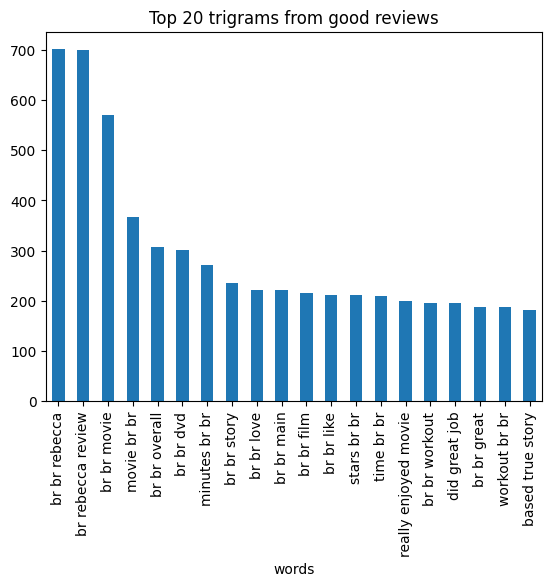

In [ ]:
# trigramas para buenas revisiones
common_words = get_top_n_words(good_reviews['text'], 20, 3)
for word, freq in common_words:
    print(word, freq)

df = pd.DataFrame(common_words, columns=['words', 'count'])
df.groupby('words').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 trigrams from good reviews'
)

Algunos de los bigramas y trigramas están claramente relacionados con el tema, pero no necesariamente con buenas críticas. Por ejemplo, "blu ray", "lanzamiento de blu ray", "tommy lee jones", "historia real basada".

Otros están más obviamente relacionados específicamente con buenas críticas, como "hace un trabajo excelente", "muy recomendable", "gran película".

Las palabras importantes como "bueno" (así como las que aparecen en los otros n-gramas anteriores) tienden a ser adjetivos. Los adjetivos describen sustantivos. Más específicamente, un adjetivo casi siempre describe el sustantivo que le sigue y que está más cerca de él en una oración. A veces los adjetivos no van directamente después. Por ejemplo, "Esta fue una película buena e interesante" todavía tiene "buena" y "película" vinculadas.

Esto sugiere que podemos usar el etiquetado POS para extraer las ubicaciones de los adjetivos y sustantivos, luego iterar a través de todos los adjetivos y contar hacia adelante desde cada uno hasta llegar al siguiente sustantivo. Estas son nuestras palabras informativas.

Escribamos una(s) función(es) que transforme una oración en una nueva lista de texto emparejando iterativamente cada adjetivo en la oración con el siguiente sustantivo que le sigue en la oración. Por ejemplo, el texto "Esa fue una película larga y buena" debería devolver ["buena película", "película larga"].

In [ ]:
#Hacemos una función que toma el primer adjetivo y su sustantivo asociado, luego devuelve (i) el par y (ii) una oración más corta.
def grab_first_pair(sentence):
    words = nltk.word_tokenize(sentence)
    adjectives = [k for k, v in nltk.pos_tag(words) if v == 'JJ']
    if(len(adjectives) > 0):
        shorter = re.findall(adjectives[0] +'.*',sentence)[0]
        words2 = nltk.word_tokenize(shorter)
        nouns = [k for k,v in nltk.pos_tag(words) if v == 'NN']
        if(len(nouns) > 0):
            shorter = shorter.split(' ', 1)[1]
            return(adjectives[0], nouns[0], shorter)
    return('', '', '')

# Creamos una funcion que use la anterior para iterar en las oraciones
def grab_all_pairs(sentence):
    pairs = []
    noun = ''
    adj =''
    while(len(sentence) > 0):
        adj, noun, sentence = grab_first_pair(sentence)
        if(adj != ''):
            pairs.append(adj + ' ' + noun)
    return(pairs)

#Creamos una funcion que itere por muchas oraciones luego de tokenizar
def make_pair_list(corpus):
    sentences = nltk.sent_tokenize(BigRev)
    pairs = []
    for sentence in sentences:
        pairs.extend(grab_all_pairs(sentence))

In [ ]:
sentence = "The big black dog scared the red cat."
print(grab_first_pair(sentence))
print(grab_all_pairs(sentence))

('big', 'dog', 'black dog scared the red cat.')
['big dog', 'black dog', 'red dog', 'red cat']
